In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import os
%matplotlib inline

In [2]:
abeta_seq = "DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA"

In [2]:
# GlpG_seq = "ERAGPVTWVMMIACVVVFIAMQILGDQEVMLWLAWPFDPTLKFEFWRYFTHALMHFSLMHILFNLLWWWYLGGAVEKRLGSGKLIVITLISALLSGYVQQKFSGPWFGGLSGVVYALMGYVWLRGERDPQSGIYLQRGLIIFALIWIVAGWFDLFGMSMANGAHIAGLAVGLAMAFVDSLN"

In [1]:
# t = "MTRTEIIRELERSLRLQLVLAIFLMALLIVLLWLQQNGSSNNNVNYLLIVILVLVLVIVALAVIQKYLVEQLKRQADPTDDSRTEIIRELERSLRLQLVLAIFLMALLIVLLWLQQNGSSNNNVNYLLIVILVLVLVIVALAVTQKYLVEQLKRQD"

In [2]:
# scTMHC2_seq = "MTRTEIIRELERSLRLQLVLAIFLMALLIVLLWLQQNGSSNNNVNYLLIVILVLVLVIVALAVIQKYLVEQLKRQADPTDDSRTEIIRELERSLRLQLVLAIFLMALLIVLLWLQQNGSSNNNVNYLLIVILVLVLVIVALAVTQKYLVEQLKRQD"

In [3]:
def getFromTerminal(CMD):
    return subprocess.Popen(CMD,stdout=subprocess.PIPE,shell=True).communicate()[0].decode()

In [4]:
# seq = scTMHC2_seq
# seq = GlpG_seq
seq = abeta_seq
len(seq)

42

In [5]:
seq_dataFrame = pd.DataFrame({"oneLetterCode":list(seq)})
HFscales = pd.read_table("/Users/weilu/opt/small_script/Whole_residue_HFscales.txt")
# Octanol Scale
# code = {"GLY" : "G", "ALA" : "A", "LEU" : "L", "ILE" : "I",
#         "ARG+" : "R", "LYS+" : "K", "MET" : "M", "CYS" : "C",
#         "TYR" : "Y", "THR" : "T", "PRO" : "P", "SER" : "S",
#         "TRP" : "W", "ASP-" : "D", "GLU-" : "E", "ASN" : "N",
#         "GLN" : "Q", "PHE" : "F", "HIS+" : "H", "VAL" : "V",
#         "M3L" : "K", "MSE" : "M", "CAS" : "C" }
code = {"GLY" : "G", "ALA" : "A", "LEU" : "L", "ILE" : "I",
        "ARG+" : "R", "LYS+" : "K", "MET" : "M", "CYS" : "C",
        "TYR" : "Y", "THR" : "T", "PRO" : "P", "SER" : "S",
        "TRP" : "W", "ASP-" : "D", "GLU-" : "E", "ASN" : "N",
        "GLN" : "Q", "PHE" : "F", "HIS0" : "H", "VAL" : "V",
        "M3L" : "K", "MSE" : "M", "CAS" : "C" }
HFscales_with_oneLetterCode = HFscales.assign(oneLetterCode = HFscales.AA.str.upper().map(code)).dropna()
data = seq_dataFrame.merge(HFscales_with_oneLetterCode, on="oneLetterCode", how="left")

In [9]:
HFscales

,AA,DGwif,DGwoct,Oct-IF
0,Ala,0.17,0.50,0.33
1,Arg+,0.81,1.81,1.00
2,Asn,0.42,0.85,0.43
3,Asp-,1.23,3.64,2.41
4,Asp0,-0.07,0.43,0.50
5,Cys,-0.24,-0.02,0.22
6,Gln,0.58,0.77,0.19
7,Glu-,2.02,3.63,1.61
8,Glu0,-0.01,0.11,0.12
9,Gly,0.01,1.15,1.14


In [6]:
print(HFscales.query("AA !='His+' and AA != 'Glu0'")[["AA", "DGwoct"]].to_latex())

\begin{tabular}{llr}
\toprule
{} &    AA &  DGwoct \\
\midrule
0  &   Ala &    0.50 \\
1  &  Arg+ &    1.81 \\
2  &   Asn &    0.85 \\
3  &  Asp- &    3.64 \\
4  &  Asp0 &    0.43 \\
5  &   Cys &   -0.02 \\
6  &   Gln &    0.77 \\
7  &  Glu- &    3.63 \\
9  &   Gly &    1.15 \\
11 &  His0 &    0.11 \\
12 &   Ile &   -1.12 \\
13 &   Leu &   -1.25 \\
14 &  Lys+ &    2.80 \\
15 &   Met &   -0.67 \\
16 &   Phe &   -1.71 \\
17 &   Pro &    0.14 \\
18 &   Ser &    0.46 \\
19 &   Thr &    0.25 \\
20 &   Trp &   -2.09 \\
21 &   Tyr &   -0.71 \\
22 &   Val &   -0.46 \\
\bottomrule
\end{tabular}



In [8]:
HFscales.to_latex()

'\\begin{tabular}{llrrr}\n\\toprule\n{} &    AA &  DGwif &  DGwoct &  Oct-IF \\\\\n\\midrule\n0  &   Ala &   0.17 &    0.50 &    0.33 \\\\\n1  &  Arg+ &   0.81 &    1.81 &    1.00 \\\\\n2  &   Asn &   0.42 &    0.85 &    0.43 \\\\\n3  &  Asp- &   1.23 &    3.64 &    2.41 \\\\\n4  &  Asp0 &  -0.07 &    0.43 &    0.50 \\\\\n5  &   Cys &  -0.24 &   -0.02 &    0.22 \\\\\n6  &   Gln &   0.58 &    0.77 &    0.19 \\\\\n7  &  Glu- &   2.02 &    3.63 &    1.61 \\\\\n8  &  Glu0 &  -0.01 &    0.11 &    0.12 \\\\\n9  &   Gly &   0.01 &    1.15 &    1.14 \\\\\n10 &  His+ &   0.96 &    2.33 &    1.37 \\\\\n11 &  His0 &   0.17 &    0.11 &   -0.06 \\\\\n12 &   Ile &  -0.31 &   -1.12 &   -0.81 \\\\\n13 &   Leu &  -0.56 &   -1.25 &   -0.69 \\\\\n14 &  Lys+ &   0.99 &    2.80 &    1.81 \\\\\n15 &   Met &  -0.23 &   -0.67 &   -0.44 \\\\\n16 &   Phe &  -1.13 &   -1.71 &   -0.58 \\\\\n17 &   Pro &   0.45 &    0.14 &   -0.31 \\\\\n18 &   Ser &   0.13 &    0.46 &    0.33 \\\\\n19 &   Thr &   0.14 &    0.25 & 

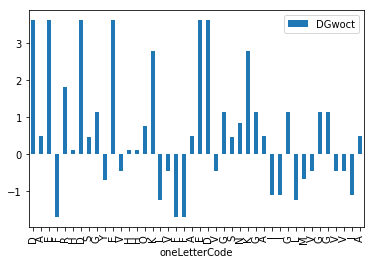

In [7]:
data.plot("oneLetterCode", "DGwoct", kind="bar")
plt.show()

In [8]:
data

,oneLetterCode,AA,DGwif,DGwoct,Oct-IF
0,D,Asp-,1.23,3.64,2.41
1,A,Ala,0.17,0.50,0.33
2,E,Glu-,2.02,3.63,1.61
3,F,Phe,-1.13,-1.71,-0.58
4,R,Arg+,0.81,1.81,1.00
5,H,His0,0.17,0.11,-0.06
6,D,Asp-,1.23,3.64,2.41
7,S,Ser,0.13,0.46,0.33
8,G,Gly,0.01,1.15,1.14
9,Y,Tyr,-0.94,-0.71,0.23


In [19]:
data.sum()

oneLetterCode           DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA
AA               Asp-AlaGlu-PheArg+His0Asp-SerGlyTyrGlu-ValHis0...
DGwif                                                         8.86
DGwoct                                                       25.86
Oct-IF                                                          17
dtype: object

In [10]:
z = data["DGwoct"].values
np.savetxt("/Users/weilu/opt/abeta/zim", z, fmt="%.2f")

In [13]:
for i in range(12):
    os.system("cat /Users/weilu/opt/abeta/zim >> /Users/weilu/opt/abeta/zim12")

In [9]:
data[24:57].sum()

oneLetterCode                    GDQEVMLWLAWPFDPTLKFEFWRYFTHALMHFS
AA               GlyAsp-GlnGlu-ValMetLeuTrpLeuAlaTrpProPheAsp-P...
DGwif                                                        -3.89
DGwoct                                                         1.2
Oct-IF                                                        5.09
dtype: object

In [6]:
data.query("oneLetterCode == 'H'")

,oneLetterCode,AA,DGwif,DGwoct,Oct-IF
50,H,His0,0.17,0.11,-0.06
54,H,His0,0.17,0.11,-0.06
59,H,His0,0.17,0.11,-0.06
163,H,His0,0.17,0.11,-0.06


In [31]:
HFscales

,AA,DGwif,DGwoct,Oct-IF
0,Ala,0.17,0.50,0.33
1,Arg+,0.81,1.81,1.00
2,Asn,0.42,0.85,0.43
3,Asp-,1.23,3.64,2.41
4,Asp0,-0.07,0.43,0.50
5,Cys,-0.24,-0.02,0.22
6,Gln,0.58,0.77,0.19
7,Glu-,2.02,3.63,1.61
8,Glu0,-0.01,0.11,0.12
9,Gly,0.01,1.15,1.14


In [6]:
x = HFscales_with_oneLetterCode["DGwif"].values
y = HFscales_with_oneLetterCode["DGwoct"].values

In [7]:
z = data["DGwoct"].values
np.savetxt("/Users/weilu/Research/server/apr_2018/rg_0.15_lipid_1.0_mem_1_go_0.8/simulation/dis_30.0/1/original_9/test", z, fmt="%.2f")

In [23]:
z = data["Oct-IF"].values
np.savetxt("/Users/weilu/Research/server/apr_2018/zim_oct_if", z, fmt="%.2f")

In [8]:
data.query("oneLetterCode == 'H'")

,oneLetterCode,AA,DGwif,DGwoct,Oct-IF
50,H,His0,0.17,0.11,-0.06
54,H,His0,0.17,0.11,-0.06
59,H,His0,0.17,0.11,-0.06
163,H,His0,0.17,0.11,-0.06


In [10]:
import scipy
from scipy import stats

In [11]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)

In [12]:
r_value

0.91940864394069144

In [13]:
intercept

0.23821446874895916

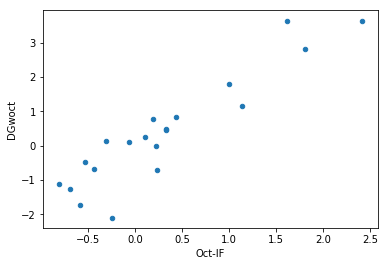

In [11]:
HFscales_with_oneLetterCode.plot("Oct-IF", "DGwoct", kind="scatter")

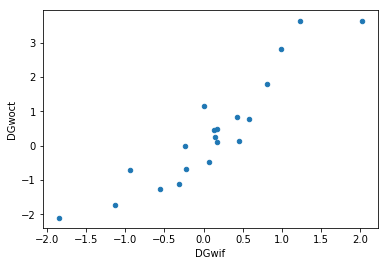

In [14]:
HFscales_with_oneLetterCode.plot("DGwif", "DGwoct", kind="scatter")

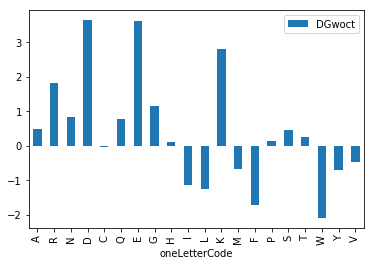

In [15]:
HFscales_with_oneLetterCode.plot("oneLetterCode", "DGwoct", kind="bar")

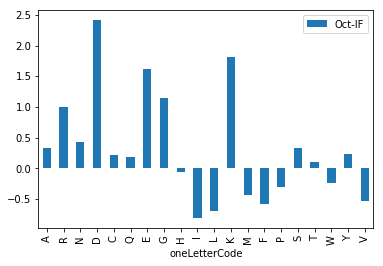

In [12]:
HFscales_with_oneLetterCode.plot("oneLetterCode", "Oct-IF", kind="bar")

In [22]:
def isHelix(id):
    helices_list = [(94,114), (147,168), (171, 192), (200, 217), (226, 241), (250, 269)]
    for count, (i, j) in enumerate(helices_list):
        if id >= i and id <= j:
            return 1+count
    return 0
data["resId"] = 91 + data.index
data["isHelix"] = data["resId"].apply(isHelix)

In [23]:
def isHelix2(id):
    helices_list = [(95,114), (148,169), (171, 193), (201, 217), (227, 241), (251, 268)]
    for count, (i, j) in enumerate(helices_list):
        if id >= i and id <= j:
            return 1+count
    return 0
data["resId"] = 91 + data.index
data["isHelix2"] = data["resId"].apply(isHelix2)

In [24]:
def isHelix3(id):
    helices_list = [(91,114), (115,169), (171, 192), (193, 217), (226, 241), (242, 268)]
    for count, (i, j) in enumerate(helices_list):
        if id >= i and id <= j:
            return 1+count
    return 0
data["resId"] = 91 + data.index
data["isHelix3"] = data["resId"].apply(isHelix3)

In [25]:
def isHelix4(id):
    helices_list = [(91,114), (115,170), (174, 192), (193, 213), (229, 241), (242, 267)]
    for count, (i, j) in enumerate(helices_list):
        if id >= i and id <= j:
            return 1+count
    return 0
data["resId"] = 91 + data.index
data["isHelix4"] = data["resId"].apply(isHelix4)

In [26]:
data.groupby("isHelix").sum()

,DGwif,DGwoct,Oct-IF,resId,isHelix2,isHelix3,isHelix4
isHelix,,,,,,,
0,-5.40,8.75,14.15,10440,5,145,147
1,-3.53,-9.43,-5.90,2184,20,21,21
2,-6.16,-4.73,1.43,3465,42,44,44
3,-1.24,-0.13,1.11,3993,66,66,57
4,-1.46,2.35,3.81,3753,68,72,56
5,-5.37,-7.45,-2.08,3736,75,80,65
6,0.35,4.59,4.24,5190,108,114,108


In [9]:
data.groupby("isHelix4").sum()

,DGwif,DGwoct,Oct-IF,resId,isHelix
isHelix4,,,,,
0,7.99,23.32,15.33,4909,52
1,-0.53,-3.49,-2.96,2460,21
2,-10.73,-4.09,6.64,7980,44
3,-2.37,-4.54,-2.17,3477,57
4,-7.48,-5.80,1.68,4263,56
5,-6.77,-11.18,-4.41,3055,65
6,-2.92,-0.27,2.65,6617,108


In [12]:
data.groupby("isHelix4").sum().sum(axis=0)

DGwif        -22.81
DGwoct        -6.05
Oct-IF        16.76
resId      32761.00
isHelix      403.00
dtype: float64

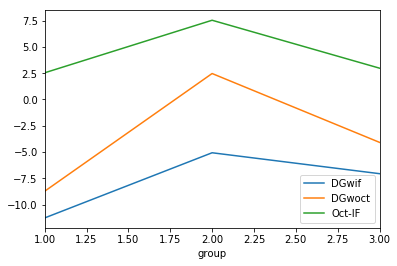

In [33]:
a = data.groupby("isHelix3").sum().drop(["isHelix","isHelix2", "isHelix4"], axis=1)[1:].reset_index()
a["group"] = (a["isHelix3"]+1) // 2
b = a.groupby("group").sum()
b.drop(["resId", "isHelix3"],axis=1).plot()

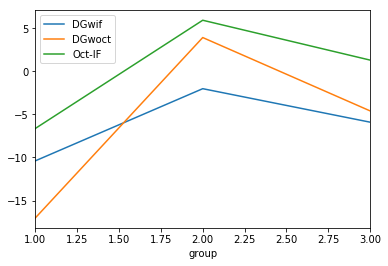

In [32]:
a = data.groupby("isHelix2").sum().drop(["isHelix","isHelix3", "isHelix4"], axis=1)[1:].reset_index()
a["group"] = (a["isHelix2"]+1) // 2
b = a.groupby("group").sum()
b.drop(["resId", "isHelix2"],axis=1).plot()

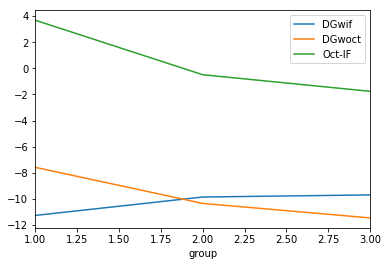

In [31]:
a = data.groupby("isHelix4").sum()[1:].reset_index()
a["group"] = (a["isHelix4"]+1) // 2
b = a.groupby("group").sum()
b.drop(["resId", "isHelix4"],axis=1).plot()

In [59]:
data[110:]

,oneLetterCode,AA,DGwif,DGwoct,Oct-IF,resId,isHelix,isHelix2,isHelix3,isHelix4,isHelix5,isHelix6
110,S,Ser,0.13,0.46,0.33,201,4,4,4,4,4,4
111,G,Gly,0.01,1.15,1.14,202,4,4,4,4,4,4
112,V,Val,0.07,-0.46,-0.53,203,4,4,4,4,4,4
113,V,Val,0.07,-0.46,-0.53,204,4,4,4,4,4,4
114,Y,Tyr,-0.94,-0.71,0.23,205,4,4,4,4,4,4
115,A,Ala,0.17,0.50,0.33,206,4,4,4,4,4,4
116,L,Leu,-0.56,-1.25,-0.69,207,4,4,4,4,4,4
117,M,Met,-0.23,-0.67,-0.44,208,4,4,4,4,4,4
118,G,Gly,0.01,1.15,1.14,209,4,4,4,4,4,4
119,Y,Tyr,-0.94,-0.71,0.23,210,4,4,4,4,4,4


In [ ]:
b = a.groupby("group").sum()

In [18]:
data.groupby("isHelix").sum()

,DGwif,DGwoct,Oct-IF,resId
isHelix,,,,
0,-5.40,8.75,14.15,10440
1,-3.53,-9.43,-5.90,2184
2,-6.16,-4.73,1.43,3465
3,-1.24,-0.13,1.11,3993
4,-1.46,2.35,3.81,3753
5,-5.37,-7.45,-2.08,3736
6,0.35,4.59,4.24,5190


In [20]:
data.groupby("isHelix2").sum()

,DGwif,DGwoct,Oct-IF,resId,isHelix
isHelix2,,,,,
0,-4.51,11.63,16.14,11264,24
1,-3.54,-10.58,-7.04,2090,20
2,-6.85,-6.44,0.41,3487,42
3,-1.11,0.33,1.44,4186,66
4,-0.90,3.60,4.50,3553,68
5,-5.95,-8.22,-2.27,3510,75
6,0.05,3.63,3.58,4671,108


In [22]:
data.groupby("isHelix3").sum()

,DGwif,DGwoct,Oct-IF,resId,isHelix,isHelix2
isHelix3,,,,,,
0,0.59,4.29,3.70,2752,6,0
1,-0.53,-3.49,-2.96,2460,21,20
2,-10.74,-5.24,5.50,7810,44,44
3,-1.24,-0.13,1.11,3993,66,66
4,-3.83,2.60,6.43,5125,72,71
5,-5.37,-7.45,-2.08,3736,80,75
6,-1.69,3.37,5.06,6885,114,108


In [40]:
# pd.options.display.max_rows = 999
# data

In [ ]:
data.groupby("isHelix").sum()

In [41]:
data.groupby("isHelix").sum()

,DGwif,DGwoct,Oct-IF,resId
isHelix,,,,
0,0.59,4.29,3.70,2752
1,-0.53,-3.49,-2.96,2460
2,-10.74,-5.24,5.50,7810
3,-1.24,-0.13,1.11,3993
4,-3.83,2.60,6.43,5125
5,-5.37,-7.45,-2.08,3736
6,-1.69,3.37,5.06,6885


In [32]:
a = data.groupby("isHelix").sum()[1:].reset_index()
a["group"] = (a["isHelix"]+1) // 2
b = a.groupby("group").sum()
b.drop(["resId", "isHelix"],axis=1).plot()

In [35]:
b

,isHelix,DGwif,DGwoct,Oct-IF,resId
group,,,,,
1,3,-14.28,-15.82,-1.54,9900
2,7,-5.07,2.47,7.54,9118
3,11,-7.06,-4.08,2.98,10621


In [21]:
b

,isHelix,DGwif,DGwoct,Oct-IF,resId
group,,,,,
1,3,-10.39,-17.02,-6.63,5577
2,7,-2.01,3.93,5.94,7739
3,11,-5.90,-4.59,1.31,8181


In [22]:
-4.59*1.6

-7.344

In [23]:
a.reset_index(drop=True)

,isHelix,DGwif,DGwoct,Oct-IF,resId,group
0,1,-3.54,-10.58,-7.04,2090,1
1,2,-6.85,-6.44,0.41,3487,1
2,3,-1.11,0.33,1.44,4186,2
3,4,-0.90,3.60,4.50,3553,2
4,5,-5.95,-8.22,-2.27,3510,3
5,6,0.05,3.63,3.58,4671,3


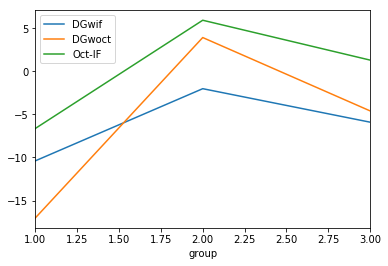

In [24]:
b.drop(["resId", "isHelix"],axis=1).plot()

In [25]:
6*0.6

3.5999999999999996

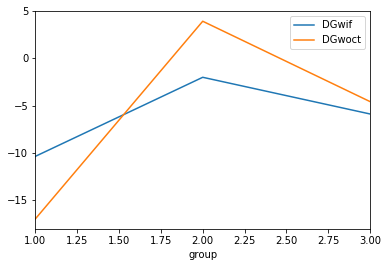

In [26]:
b.drop(["resId", "isHelix", "Oct-IF"],axis=1).plot()

In [30]:
data = pd.read_feather("/Users/weilu/Research/data/pulling/GlpG_Hydrophobicity.feather")

In [ ]:
# data.join(zim123).to_feather("/Users/weilu/Research/data/pulling/GlpG_Hydrophobicity.feather")

In [18]:
data.sum()

oneLetterCode           DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA
AA               Asp-AlaGlu-PheArg+His0Asp-SerGlyTyrGlu-ValHis0...
DGwif                                                         8.86
DGwoct                                                       25.86
Oct-IF                                                          17
dtype: object

In [16]:
data

,oneLetterCode,AA,DGwif,DGwoct,Oct-IF
0,D,Asp-,1.23,3.64,2.41
1,A,Ala,0.17,0.50,0.33
2,E,Glu-,2.02,3.63,1.61
3,F,Phe,-1.13,-1.71,-0.58
4,R,Arg+,0.81,1.81,1.00
5,H,His0,0.17,0.11,-0.06
6,D,Asp-,1.23,3.64,2.41
7,S,Ser,0.13,0.46,0.33
8,G,Gly,0.01,1.15,1.14
9,Y,Tyr,-0.94,-0.71,0.23


In [15]:
data.sum()

oneLetterCode           DAEFRHDSGYEVHHQKLVFFAEDVGSNKGAIIGLMVGGVVIA
AA               Asp-AlaGlu-PheArg+His0Asp-SerGlyTyrGlu-ValHis0...
DGwif                                                         8.86
DGwoct                                                       25.86
Oct-IF                                                          17
dtype: object

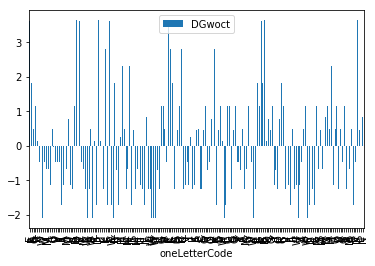

In [31]:
data.plot("oneLetterCode", "DGwoct", kind="bar")
plt.show()

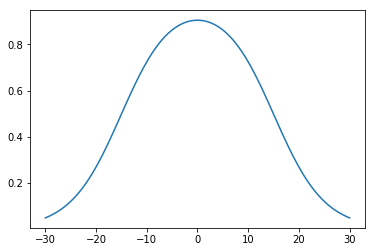

In [21]:
def V_membrane(z, kbin=0.5, memb=14.4):
    return 0.5*(np.tanh(kbin*(z+memb)) + np.tanh(kbin*(memb-z)))
kbin = 0.1
memb = 15
z = np.linspace(-30,30,100)
v = V_membrane(z, kbin, memb)
plt.plot(z,v)

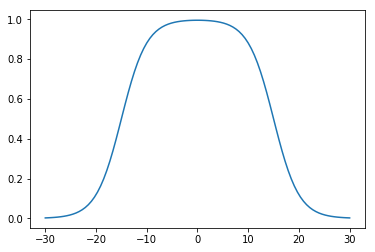

In [4]:
def V_membrane(z, kbin=0.5, memb=14.4):
    return 0.5*(np.tanh(kbin*(z+memb)) + np.tanh(kbin*(memb-z)))
kbin = 0.2
memb = 15
z = np.linspace(-30,30,100)
v = V_membrane(z, kbin, memb)
plt.plot(z,v)

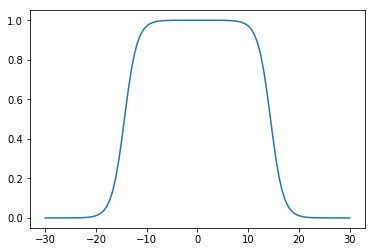

In [35]:
def V_membrane(z, kbin=0.2, memb=14.4):
    return 0.5*(np.tanh(kbin*(z+memb)) + np.tanh(kbin*(memb-z)))
kbin = 0.4
memb = 14.4
z = np.linspace(-30,30,100)
v = V_membrane(z, kbin, memb)
plt.plot(z,v)

In [33]:
V_membrane(-20)/V_membrane(0)

0.096822766552771625

In [34]:
V_membrane(-10)/V_membrane(0)

0.85854569921930957

In [ ]:
, (174, 192), (193, 213), (229, 241), (242, 267)

In [60]:
def isHelix6(id):
    helices_list = [(93,113), (132,163), (174, 190), (197, 213), (229, 241), (242, 267)]
    for count, (i, j) in enumerate(helices_list):
        if id >= i and id <= j:
            return 1+count
    return 0
data["resId"] = 91 + data.index
data["isHelix6"] = data["resId"].apply(isHelix6)

In [61]:
data.groupby("isHelix6").sum()

,DGwif,DGwoct,Oct-IF,resId,isHelix,isHelix2,isHelix3,isHelix4,isHelix5
isHelix6,,,,,,,,,
0,11.98,39.53,27.55,9627,69,63,117,73,22
1,-2.80,-7.68,-4.88,2163,20,19,21,21,21
2,-13.85,-15.36,-1.51,4720,34,32,64,64,64
3,-2.23,-5.63,-3.40,3094,51,51,51,51,51
4,-6.22,-5.46,0.76,3485,56,52,68,68,68
5,-6.77,-11.18,-4.41,3055,65,65,65,65,65
6,-2.92,-0.27,2.65,6617,108,102,156,156,156


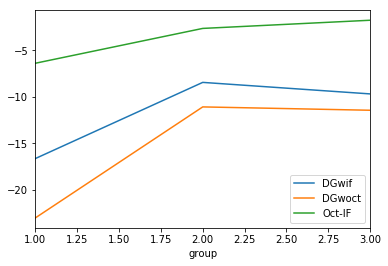

In [65]:
a = data.groupby("isHelix6").sum()[1:].reset_index()
a["group"] = (a["isHelix6"]+1) // 2
b = a.groupby("group").sum()
# b.drop(["resId", "isHelix"],axis=1).plot()
b[["DGwif", "DGwoct", "Oct-IF"]].plot()

In [42]:
with open("/Users/weilu/Research/2xov_ca.dat", "r") as f:
    for line in f:
#         print(line)
        a = float(line.split()[-4])
#         print(a)
        i = int(line.split()[-7])
        if a > 14.4 or a < -14.4:
            c = 1
        else:
            c = 0
        print(i,a, c)
        

91 -20.024 1
92 -16.438 1
93 -13.538 0
94 -13.95 0
95 -11.664 0
96 -9.115 0
97 -8.906 0
98 -8.464 0
99 -5.973 0
100 -3.741 0
101 -3.67 0
102 -2.909 0
103 -0.142 0
104 1.537 0
105 1.457 0
106 2.909 0
107 5.696 0
108 6.387 0
109 6.738 0
110 9.091 0
111 11.163 0
112 11.493 0
113 12.486 0
114 14.848 1
115 15.794 1
116 14.667 1
117 17.527 1
118 16.809 1
119 13.197 0
120 14.113 0
121 16.415 1
122 13.255 0
123 10.542 0
124 12.284 0
125 11.966 0
126 14.548 1
127 17.939 1
128 20.115 1
129 19.649 1
130 19.492 1
131 16.201 1
132 14.362 0
133 12.065 0
134 11.046 0
135 7.757 0
136 6.338 0
137 8.974 0
138 7.271 0
139 4.474 0
140 5.737 0
141 7.741 0
142 4.381 0
143 4.146 0
144 7.254 0
145 7.27 0
146 10.242 0
147 8.846 0
148 5.791 0
149 4.578 0
150 5.035 0
151 2.823 0
152 0.336 0
153 -0.632 0
154 -0.484 0
155 -2.845 0
156 -5.207 0
157 -5.633 0
158 -5.835 0
159 -8.486 0
160 -10.571 0
161 -10.203 0
162 -9.658 0
163 -12.458 0
164 -14.843 1
165 -13.906 0
166 -14.281 0
167 -17.633 1
168 -19.251 1
169 -17.5